In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

#### Selecting & loading sets of positive and negative tweets

In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [7]:
print ("No of positive tweets are : " + str(len(all_positive_tweets)))
print("No of negative tweets are : " + str(len(all_negative_tweets)))

No of positive tweets are : 5000
No of negative tweets are : 5000


This means our dataset is been equally divided into positive & negative class

Checking data types

In [8]:
print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))


The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


#### Visualization using Pie Chart

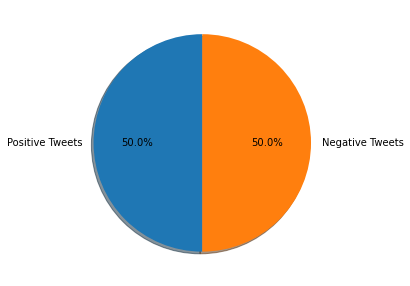

In [12]:
fig = plt.figure(figsize=(8, 5))
labels = 'Positive Tweets', 'Negative Tweets'
sizes = [len(all_positive_tweets), len(all_negative_tweets)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()


In [18]:
print(all_positive_tweets[random.randint(0,5000)])
print(all_negative_tweets[random.randint(0,5000)])

print("\n")


print(" Coloring Positive Tweet as GREEN & Negative Tweet as RED")

print('\n')

#printing positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])


@IsmailHasan19  a mail follback :)
I hate breaking out :(


 Coloring Positive Tweet as GREEN & Negative Tweet as RED


Every year in August I get fever :p dunno why 😷
@Craig_J_Hastie @MassDeception1 lolzz, unfortunately dats how it is :(


## Pre-processing our Data

For NLP we have 4 steps for pre-processing 
1. Toeknize string
2. Lowercase
3. Remove stopwords and punctuation
4. Stemming

Taking a sample tweet

In [19]:
tweet = all_positive_tweets[2255]

In [20]:
tweet

'New story illustration for your visual pleasure. Thanks for looking :) https://t.co/zIITPKlIPz'

In [21]:
# Downloading Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

As it is Twitter dataset, there are various marks and styles which needs to be removed.

In [24]:
print("Tweet before removing " )
print('\n')
print(tweet)
print('\n')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print('Tweet after removing hashtags, hyperlinks, RT(retweet)')
print('\n')
print(tweet2)

Tweet before removing 


New story illustration for your visual pleasure. Thanks for looking :) https://t.co/zIITPKlIPz


Tweet after removing hashtags, hyperlinks, RT(retweet)


New story illustration for your visual pleasure. Thanks for looking :) 


### Tokenize String

To tokenize means to split the strings into individual words without blanks or tabs.

In [25]:
print(tweet2)

#intiating tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

#tokenize tweets
tokenize_tweet  = tokenizer.tokenize(tweet2)
print()
print("Tokenized tweet is")
print('\n')
print(tokenize_tweet)

New story illustration for your visual pleasure. Thanks for looking :) 

Tokenized tweet is


['new', 'story', 'illustration', 'for', 'your', 'visual', 'pleasure', '.', 'thanks', 'for', 'looking', ':)']


### Remove Stopwords & Punctuation

In [26]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [29]:
print(tokenize_tweet)
print()
clean_tweets=[]

for item in tokenize_tweet:
    if item not in stopwords_english and item not in string.punctuation:
        clean_tweets.append(item)
    else:
        continue

print('After removing punctuation and stopwords:--')
print('\n')
print(clean_tweets)

['new', 'story', 'illustration', 'for', 'your', 'visual', 'pleasure', '.', 'thanks', 'for', 'looking', ':)']

After removing punctuation and stopwords:--


['new', 'story', 'illustration', 'visual', 'pleasure', 'thanks', 'looking', ':)']


### Stemming 

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:

learn
learning
learned
learnt
All these words are stemmed from its common root learn.

NLTK has various stemming modules, Here I am using Porter Stemmer

In [34]:
print(clean_tweets)
print()
stem_tweet = []
stemmer = PorterStemmer()
for word in clean_tweets:
    stem_word = stemmer.stem(word)
    stem_tweet.append(stem_word)
    
print('After Stemming, words become')

print(stem_tweet)
    

['new', 'story', 'illustration', 'visual', 'pleasure', 'thanks', 'looking', ':)']

After Stemming, words become
['new', 'stori', 'illustr', 'visual', 'pleasur', 'thank', 'look', ':)']


## End of Pre-Processing 